In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

data = pd.read_excel('stud1.xlsx')

X_features = data[['Marks','projects','Package']]
Y_features = data['acad perf']

X_features = sm.add_constant(X_features)

train_X, test_X, train_Y, test_Y = train_test_split(X_features , Y_features,
train_size = 0.8, random_state = 42 )

model = sm.OLS(train_Y, train_X).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              acad perf   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.638e+29
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          2.09e-304
Time:                        08:59:33   Log-Likelihood:                 743.95
No. Observations:                  25   AIC:                            -1480.
Df Residuals:                      21   BIC:                            -1475.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.263e-14   1.04e-13     -0.409      0.6

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X_features):
    vif = pd.DataFrame()
    vif["Features"] = X_features.columns
    vif["VIF"] = [variance_inflation_factor(X_features.values, i) for i in range(X_features.shape[1])]
    return(vif)

vif_factors = calc_vif(X_features)
vif_factors

,Features,VIF
0,const,254.397143
1,Marks,4.668213
2,projects,1.188994
3,Package,4.905887


<Axes: >

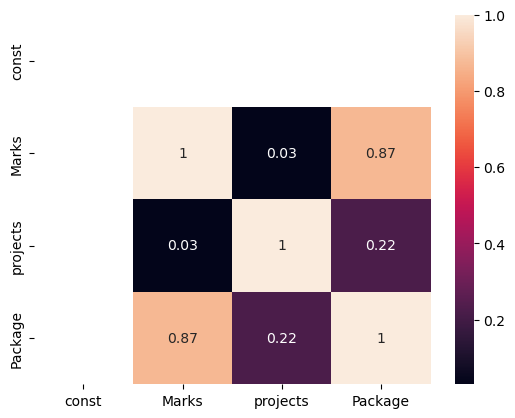

In [6]:
import seaborn as sn
columns_with_large_vif = vif_factors[vif_factors.VIF >1].Features
# print("\n\nColumns with large VIF: ", columns_with_large_vif)
sn.heatmap(X_features[columns_with_large_vif].corr(), annot=True)

In [7]:
columns_to_be_removed = ['Package']
X_new_features = list(set(X_features) - set(columns_to_be_removed))
calc_vif(X_features[X_new_features])

,Features,VIF
0,projects,1.000927
1,const,100.124037
2,Marks,1.000927


In [9]:
X_features = X_features.drop(columns_to_be_removed, axis=1)
train_X, test_X, train_Y, test_Y = train_test_split(X_features,Y_features,train_size=0.8, random_state=42)
model_2 = sm.OLS(train_Y, train_X).fit()
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              acad perf   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.528e+31
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:08:15   Log-Likelihood:                 783.80
No. Observations:                  25   AIC:                            -1562.
Df Residuals:                      22   BIC:                            -1558.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.776e-15   1.21e-14      0.147      0.884   -2.33e-14    2.68e-14
Marks          1.0000   1.49e-16   6.69e+15      0.000       1.000       1.000
projects       1.0000   1.17e-15   8.51e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                        6.316   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                7.336
Skew:                          -0.074   Prob(JB):                       0.0255
Kurtosis:                       5.650   Cond. No.                         803.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
import numpy as np

leverage_threshold = 3 * (len(train_X.columns) + 1) / len(train_X)
influence = model_2.get_influence()

# finding levarage values
leverage = influence.hat_matrix_diag
leverage_outliers = np.where(leverage >  leverage_threshold)[0]


# Printing outlier values using leverage
print("levarage outliers : \n")
for item in leverage_outliers :
    print("Value is :\n", train_X.iloc[item])
    print("\nLevarage value : ", leverage[item])

levarage outliers : 



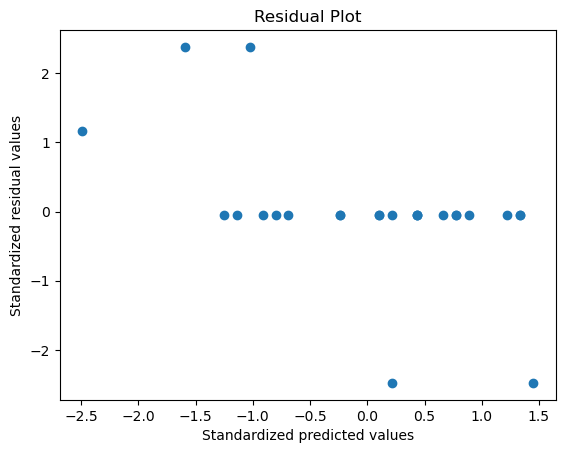

In [12]:
#There are no leverage outliers hence there is no need to retrain our model

#Residual Plot
get_standardized_values = lambda x : (x - np.mean(x))/(np.std(x))
def plot_resid_fitted(fitted, resid, title):
    plt.scatter ( get_standardized_values( fitted ),get_standardized_values( resid ) )
    plt.title(title)
    plt.xlabel("Standardized predicted values")
    plt.ylabel("Standardized residual values")
    plt.show()

plot_resid_fitted(model_2.fittedvalues,model_2.resid,"Residual Plot")